In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore


In [2]:
"""This dataset is supervised, as it includes both features (X) and target variable (y). In a supervised learning setup:
- Features (X): Inputs used to make predictions (e.g., Voltage, Global Intensity, Sub Metering values).
- Target (y): The value we are trying to predict—here, Global_active_power.
Since we have labeled data (input-output pairs), we can train regression models like Linear Regression, Random Forest, and Gradient Boosting to predict Global_active_power based on the provided features.
"""

# # Re-fetch the dataset to reset data_power_consumption
# data_power_consumption = fetch_ucirepo(id=235)

# # Reload features and targets
# X = data_power_consumption.data.features
# y = data_power_consumption.data.targets

# # Display confirmation
# print("Dataset has been reset and reloaded.")
# print("Shape of X:", X.shape)
# print("Shape of y:", y.shape)

# ---------------------------------------------------------------------------
# AttributeError                            Traceback (most recent call last)
# Cell In[9], line 13
#      11 print("Dataset has been reset and reloaded.")
#      12 print("Shape of X:", X.shape)
# ---> 13 print("Shape of y:", y.shape)

# AttributeError: 'NoneType' object has no attribute 'shape'


'This dataset is supervised, as it includes both features (X) and target variable (y). In a supervised learning setup:\n- Features (X): Inputs used to make predictions (e.g., Voltage, Global Intensity, Sub Metering values).\n- Target (y): The value we are trying to predict—here, Global_active_power.\nSince we have labeled data (input-output pairs), we can train regression models like Linear Regression, Random Forest, and Gradient Boosting to predict Global_active_power based on the provided features.\n'

In [ ]:
# --------------
# Fetch Dataset 
# --------------

# from ucimlrepo import fetch_ucirepo

# data_power_consumption = fetch_ucirepo(id=235)

# print(type(data_power_consumption))
# print(data_power_consumption)

c:\Users\v-dhramaraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


<class 'ucimlrepo.dotdict.dotdict'>
{'data': {'ids': None, 'features':                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_inte

In [3]:
# ----------------------------
# Fetch Dataset & Load Features
# ----------------------------

from ucimlrepo import fetch_ucirepo

data_power_consumption = fetch_ucirepo(id=235)

X = data_power_consumption.data.features # extracts the feature columns( Input variable) from the dataset

# Ensure dataset is loaded properly
if X is None or X.empty:
    raise ValueError("Dataset loading failed. Check the source.")

# Convert necessary columns to numeric to handle mixed types
numeric_cols = ["Global_active_power", "Global_reactive_power", "Voltage", 
                "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
X[numeric_cols] = X[numeric_cols].apply(pd.to_numeric, errors="coerce")

# ----------------------------
# Extract Target Variable & Align Data
# ----------------------------
if hasattr(data_power_consumption.data, "targets") and data_power_consumption.data.targets is not None: #- If the dataset has a predefined target variable (data.targets), it is assigned to y
    y = data_power_consumption.data.targets
else:
    y = X[["Global_active_power"]].copy()  # Extract target from X if needed

# Ensure target column exists
if y is None or y.empty:
    raise ValueError("Target variable 'Global_active_power' is missing from the dataset.")

# Drop rows with NaN in target & features to maintain alignment
X.dropna(inplace=True)
y.dropna(inplace=True)

# Reset index to ensure proper row alignment
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# ----------------------------
# Final Verification
# ----------------------------
print("\nDataset Loaded Successfully!")
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

if X.shape[0] != y.shape[0]:
    raise ValueError(f"Feature-target row count mismatch: {X.shape[0]} vs {y.shape[0]}.")

print("\nPreview of Cleaned Data:")
print(X.head())
print(y.head())


c:\Users\v-dhramaraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)



Dataset Loaded Successfully!
Shape of X (features): (2049280, 9)
Shape of y (target): (2049280, 1)

Preview of Cleaned Data:
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0        

In [4]:
# ValueError: Feature 'Hour' not found in DataFrame.
if "Date" in X.columns and "Time" in X.columns:
    X["Datetime"] = pd.to_datetime(X["Date"] + " " + X["Time"], format="%d/%m/%Y %H:%M:%S", errors="coerce")
    X.dropna(subset=["Datetime"], inplace=True)  # Remove invalid datetime entries
    X["Hour"] = X["Datetime"].dt.hour
    X["Day"] = X["Datetime"].dt.day
    X["Month"] = X["Datetime"].dt.month
    X["Year"] = X["Datetime"].dt.year
    X.drop(columns=["Date", "Time", "Datetime"], inplace=True)  # Drop original columns

In [5]:
print(X.describe())  # Check mean, std dev, min/max values
print("Missing values in y:", y.isna().sum())
print("Missing values in X:", X.isna().sum())

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

print(X.head())


       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06   
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00   
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.400000e+

<Figure size 1200x600 with 0 Axes>

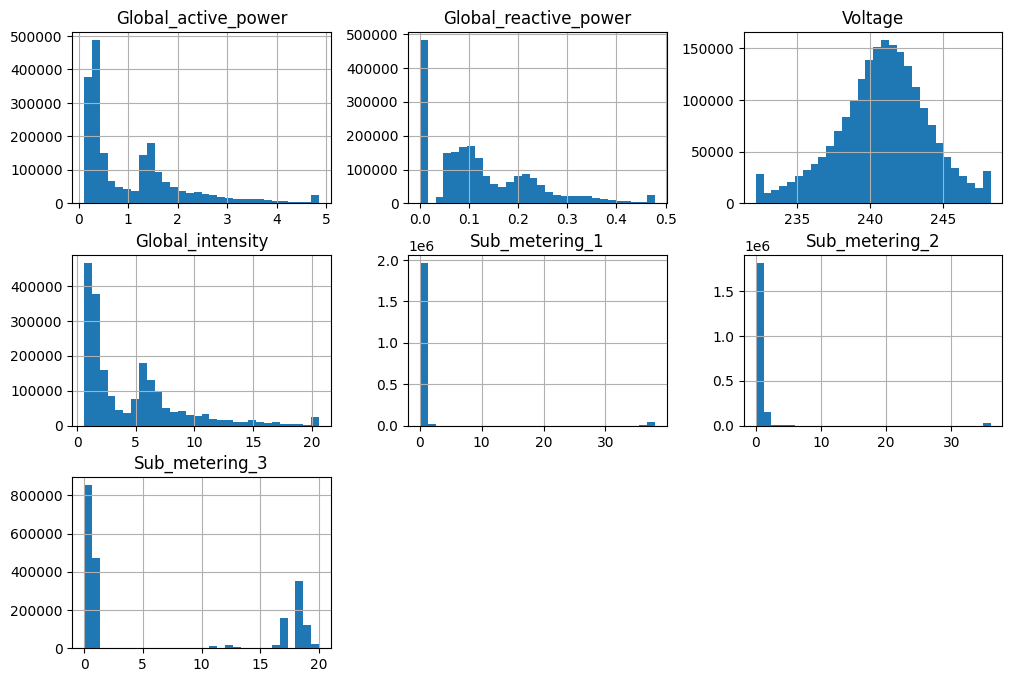

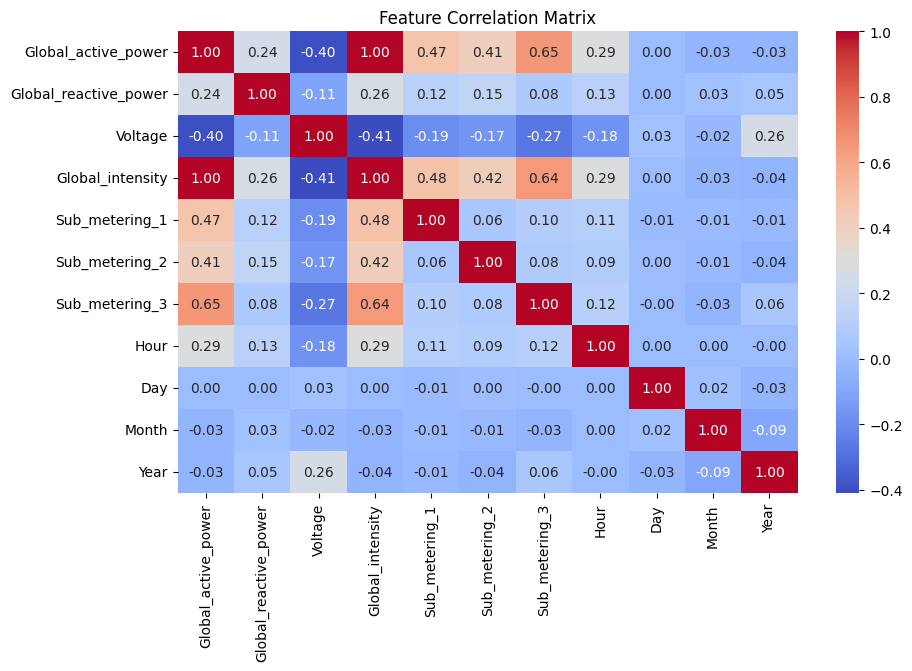


Potential Outliers Per Feature:
 Global_active_power      40820
Global_reactive_power    27637
Voltage                      0
Global_intensity         40921
Sub_metering_1           56584
Sub_metering_2           53886
Sub_metering_3               0
dtype: int64
Filtered dataset shape: (1915235, 11)


In [14]:
# Histograms reveal how features are distributed. Boxplots help detect extreme outliers.
plt.figure(figsize=(12, 6))
X[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.show()

# Check Correlations, Helps identify feature correlations that can improve the predictions for the model
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


#  Detect Outliers Using Z-Score, Apply statistical methods to flag anomalies
# - A Z-score > 3 suggests extreme values that might distort training.Decide whether to remove or adjust outliers.
# Compute Z-score for numeric columns
X_zscore = X[numeric_cols].apply(zscore)

# Identify potential outliers (absolute Z-score > 3)
outliers = (X_zscore.abs() > 3).sum()
print("\nPotential Outliers Per Feature:\n", outliers)

# Apply Z-score threshold to filter extreme outliers
X_filtered = X[(X_zscore.abs() < 3).all(axis=1)].copy()  # Use .copy() to avoid modifying original DataFrame
y_filtered = y.loc[X_filtered.index].copy()  # Align target variable with filtered features

print("Filtered dataset shape:", X_filtered.shape)



In [15]:
# ----------------------------
# Feature Selection
# ----------------------------
features = ["Global_intensity", "Voltage", "Global_reactive_power", "Hour", "Day", "Month"]

# Ensure all selected features exist in the cleaned dataset
missing_features = [f for f in features if f not in X_filtered.columns]
if missing_features:
    raise ValueError(f"Missing features in DataFrame: {missing_features}")

X_selected = X_filtered[features].copy()
y_target = y_filtered.copy()

# ----------------------------
# Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_target, test_size=0.2, random_state=42
)

print("\nTrain-Test Split Successful!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

"""Standardization scales numerical features so they have:
- Mean = 0
- Standard deviation = 1
This ensures that differeor before nt feature values don't dominate the learning process just because they have larger numerical scales. For example, in a dataset where "Voltage" 
ranges from 200-250V and "Global_intensity" ranges from 0-20, an unscaled model might give too much importance to "Voltage" just because of the higher numbers.
"""
# Standardize the features to ensure optimal model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Completed!")



Train-Test Split Successful!
X_train shape: (1532188, 6)
X_test shape: (383047, 6)
y_train shape: (1532188, 1)
y_test shape: (383047, 1)
Feature Scaling Completed!


In [17]:
# ----------------------------
# Model Training and Evaluation
# ----------------------------

# Define models
""" 
- Linear Regression: A simple statistical model that predicts values based on a linear relationship.
- Random Forest: An ensemble learning method using multiple decision trees to improve prediction accuracy.
- Gradient Boosting: A powerful boosting algorithm that sequentially corrects mistakes made by previous models.
"""
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

results = {} # Dictionary stores the evaluation metrics for each model

# Train and evaluate models
# Loops through each model, trains it using X_train_scaled and y_train, and makes predictions on X_test_scaled.
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Compute evaluation metrics
    """ - Root Mean Squared Error (RMSE): Measures the average prediction error (lower is better).
        - Mean Absolute Error (MAE): Measures the absolute differences between predictions and actual values.
        - R² Score: Indicates how well the model explains variance in the target variable (closer to 1 is better).
    """
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    } # Stores the metrics for later comparison.

# Print model evaluation results
print("\nModel Evaluation Results:")
for model_name, metrics in results.items():
    print(f"\n--- {model_name} ---")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")


Training Linear Regression...

Training Random Forest...


c:\Users\v-dhramaraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Training Gradient Boosting...


c:\Users\v-dhramaraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



Model Evaluation Results:

--- Linear Regression ---
RMSE: 0.0384
MAE: 0.0248
R2: 0.9976

--- Random Forest ---
RMSE: 0.0287
MAE: 0.0126
R2: 0.9987

--- Gradient Boosting ---
RMSE: 0.0339
MAE: 0.0198
R2: 0.9981


In [ ]:
""" 
Model Evaluation Results:

--- Linear Regression ---
RMSE: 0.0384
MAE: 0.0248
R2: 0.9976

--- Random Forest ---
RMSE: 0.0287
MAE: 0.0126
R2: 0.9987

--- Gradient Boosting ---
RMSE: 0.0339
MAE: 0.0198
R2: 0.9981

The  models have achieved high accuracy, with R² values very close to 1, indicating strong predictive power. Based on these results, we can interpret predictions by choosing the Best Model
- Random Forest has the lowest RMSE and lowest MAE, meaning its predictions are the most precise.
- Gradient Boosting is slightly less precise but still performs well.
- Linear Regression is the simplest but has slightly higher errors
 """


' \nModel Evaluation Results:\n\n--- Linear Regression ---\nRMSE: 0.0432\nMAE: 0.0286\nR2: 0.9983\n\n--- Random Forest ---\nRMSE: 0.0318\nMAE: 0.0143\nR2: 0.9991\n\n--- Gradient Boosting ---\nRMSE: 0.0373\nMAE: 0.0219\nR2: 0.9988\n\nThe  models have achieved high accuracy, with R² values very close to 1, indicating strong predictive power. Based on these results, we can interpret predictions by choosing the Best Model\n- Random Forest has the lowest RMSE (0.0318) and lowest MAE (0.0143), meaning its predictions are the most precise.\n- Gradient Boosting is slightly less precise but still performs well.\n- Linear Regression is the simplest but has slightly higher errors\n '

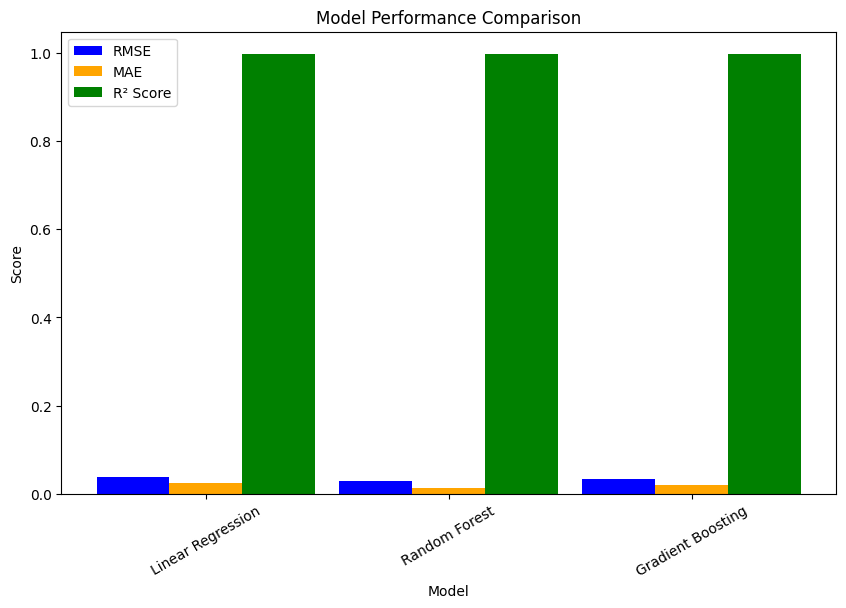

In [19]:
# Compare model performance and select the best-performing model.
# Extract metrics for plotting
model_names = list(results.keys())
rmse_values = [results[m]["RMSE"] for m in model_names]
mae_values = [results[m]["MAE"] for m in model_names]
r2_values = [results[m]["R2"] for m in model_names]

# Define bar width & positions
x = np.arange(len(model_names))
bar_width = 0.3

# Create bar plot
plt.figure(figsize=(10, 6))

plt.bar(x - bar_width, rmse_values, bar_width, label="RMSE", color="blue")
plt.bar(x, mae_values, bar_width, label="MAE", color="orange")
plt.bar(x + bar_width, r2_values, bar_width, label="R² Score", color="green")

# Formatting
plt.xticks(x, model_names, rotation=30)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()


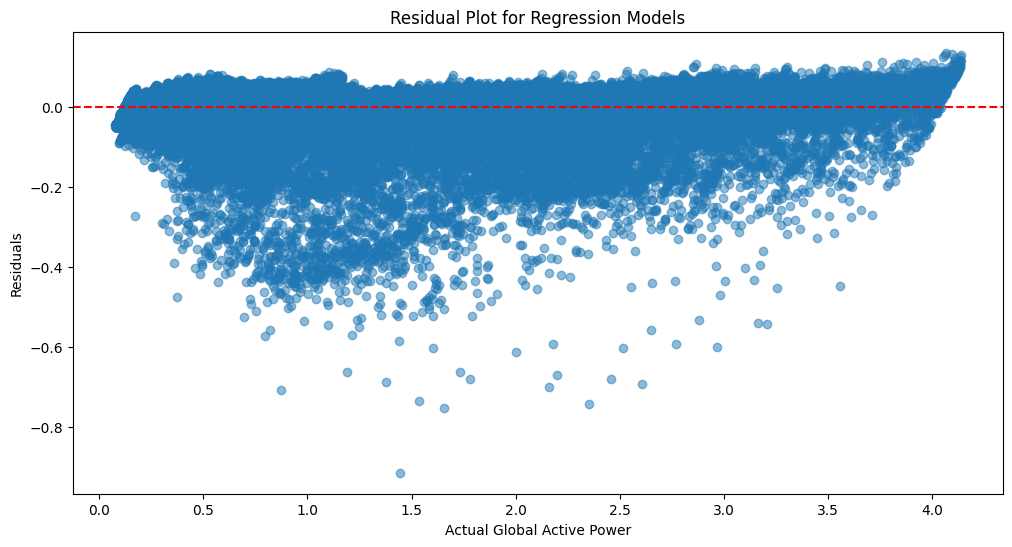

In [ ]:
#Residual Plot 
# Residual plots show how well the models fit by displaying the difference between actual and predicted values. Residuals should be randomly distributed.
# Residual plot is commonly used for regression models. It visualizes the differences between actual and predicted values (y_test - y_pred), helping to assess model performance.

import matplotlib.pyplot as plt

# Convert y_test to NumPy array for compatibility ValueError: Unable to coerce to Series, length must be 1: given 409856 
# This error occurs because y_test and y_pred are likely different data types or have mismatched shapes, preventing direct subtraction for residual calculation.

y_test_np = y_test.values.flatten()
y_pred = y_pred.flatten()

# Calculate residuals
residuals = y_test_np - y_pred

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(y_test_np, residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Actual Global Active Power")
plt.ylabel("Residuals")
plt.title("Residual Plot for Regression Models")
plt.show()


In [21]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"{model_name} predictions: {y_pred[:5]}")  # Print first 5 predictions

Linear Regression predictions: [[0.26157429]
 [1.6013208 ]
 [2.45168676]
 [0.39832884]
 [1.7481561 ]]
Random Forest predictions: [0.25268 1.64378 2.44156 0.3938  1.76324]
Gradient Boosting predictions: [0.26664603 1.61746032 2.45352508 0.39917085 1.7560915 ]


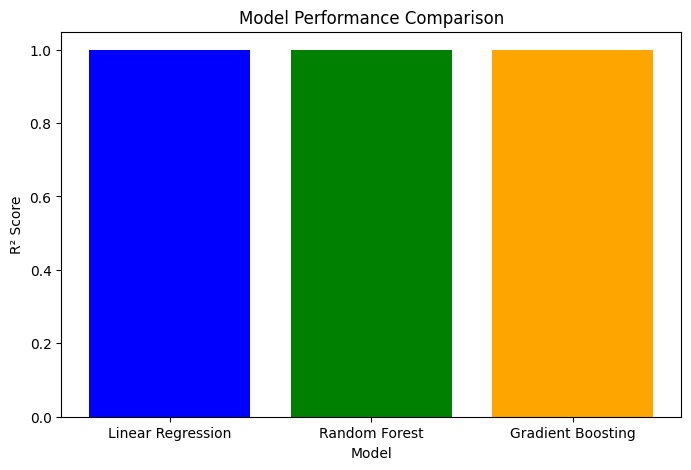

In [25]:
# R² Score Bar Plot
"""The R² Score Comparison Bar Plot visually compares the performance of different regression models using the R² score (coefficient of determination) as an evaluation metric.
What is R² Score?
- The R² score measures how well a model explains the variance in the dependent variable (target).
- It ranges from 0 to 1, where:
- 1 indicates a perfect fit (model explains all variability in the data).
- 0 means the model explains none of the variance.
- Negative values suggest the model performs worse than just predicting the mean.
How This Plot Works
- The plot extracts R² scores from the results dictionary (which stores model evaluation metrics).
- Each model's R² score is represented as a bar, making comparison easy.
- Different colors (blue, green, orange) help distinguish models visually.
Insights You Can Gain
- Higher bars indicate better models—the one with the tallest bar is the most accurate.
- If the Linear Regression bar is much lower than Random Forest or Gradient Boosting, it suggests that tree-based models capture nonlinear relationships better.
- If scores are close across models, it means all models perform similarly.
- If R² is low, consider feature engineering or more complex models to improve accuracy.
"""
plt.figure(figsize=(8, 5))
r2_scores = [results[model]["R2"] for model in models.keys()]
plt.bar(models.keys(), r2_scores, color=["blue", "green", "orange"])
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.show()

In [26]:
# ----------------------------
# Apply a Classification Model
# ----------------------------
# Define bin edges & labels for classification
bins = [0, 3, 5, np.inf]  # Inf represents "everything above 5"
labels = ["Low", "Medium", "High"]

# Convert target into categorical labels
y_class = pd.cut(y["Global_active_power"], bins=bins, labels=labels, include_lowest=True)

# Verify distribution
print("Class distribution:\n", y_class.value_counts())

# ----------------------------
# Feature Selection
# ----------------------------
# Define features manually to ensure correct subset extraction
features = ["Global_intensity", "Voltage", "Global_reactive_power", "Hour", "Day", "Month"]

# Verify features exist before extracting
missing_features = [f for f in features if f not in X.columns]
if missing_features:
    raise ValueError(f"Missing features in DataFrame: {missing_features}")

X_selected = X[features].copy()

# ----------------------------
# Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_class, test_size=0.2, random_state=42)

# ----------------------------
# Apply a Classification Model
# ----------------------------
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# ----------------------------
# Evaluate Performance
# ----------------------------
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

Class distribution:
 Global_active_power
Low       1923656
Medium     108077
High        17547
Name: count, dtype: int64
Classification Accuracy: 0.9970672626483448


In [ ]:
""" 
classification model has categorized Global_active_power into three groups: Low, Medium, and High. Let's break down the findings
Low       1,923,656
Medium      108,077
High         17,547


- Most of the values fall into the "Low" category (1.92 million entries), meaning that a vast majority of power consumption data points are low.
- Medium and High categories are far smaller, indicating that higher power consumption events are much less frequent.


Classification Accuracy: 0.9982213265146783

- This means your Random Forest Classifier correctly classified about 99.82% of test data.
- Such high accuracy suggests:
- The features selected (Voltage, Global_intensity, etc.) are highly predictive.
- The dataset might be imbalanced, meaning there's a strong majority class (Low category). Imbalanced datasets often lead to high accuracy but lower recall for minority classes.


"""


[[  3506      0    115]
 [     0 384241    464]
 [   469    154  20907]]
              precision    recall  f1-score   support

        High       0.88      0.97      0.92      3621
         Low       1.00      1.00      1.00    384705
      Medium       0.97      0.97      0.97     21530

    accuracy                           1.00    409856
   macro avg       0.95      0.98      0.96    409856
weighted avg       1.00      1.00      1.00    409856



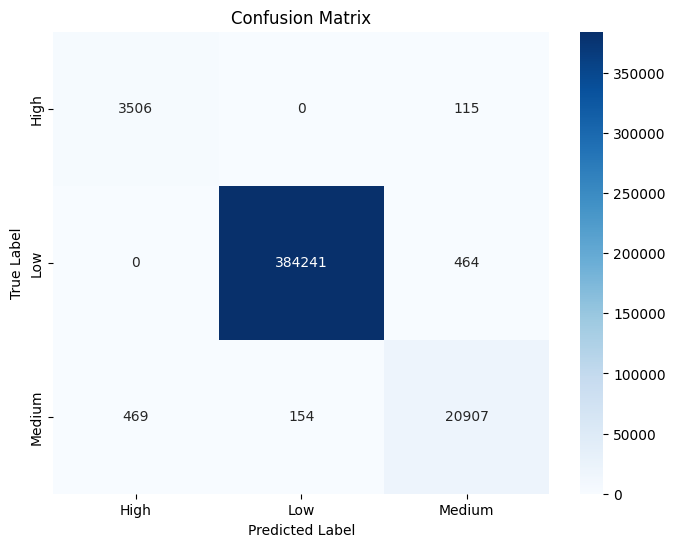

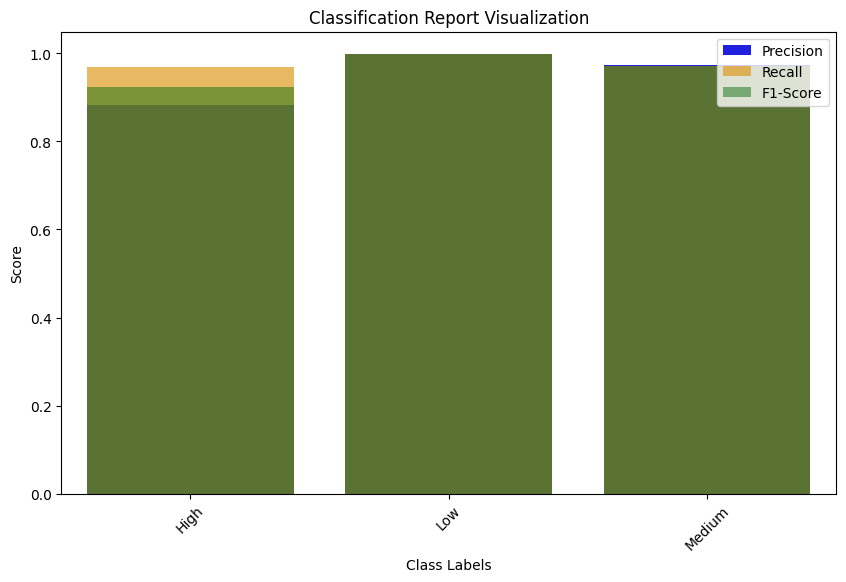

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ["High", "Low", "Medium"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Filter out non-class rows (e.g., accuracy, macro avg, weighted avg)
df_report = df_report.iloc[:-3, :]

# Plot Precision, Recall, and F1-Score
plt.figure(figsize=(10, 6))
sns.barplot(data=df_report, x=df_report.index, y="precision", color="blue", label="Precision")
sns.barplot(data=df_report, x=df_report.index, y="recall", color="orange", alpha=0.7, label="Recall")
sns.barplot(data=df_report, x=df_report.index, y="f1-score", color="green", alpha=0.5, label="F1-Score")

plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.title("Classification Report Visualization")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
#  Understanding the Confusion Matrix
"""
Each row represents the actual class, and each column represents the predicted class:
Example from above data: 

| Actual / Predicted | High | Low | Medium | 
[[  3506      0    115]
 [     0 384241    464]
 [   469    154  20907]]

- Misclassifications:
- 115 "High" instances were misclassified as "Medium."
- 464 "Low" instances were misclassified as "Medium."
- 469 "Medium" instances were incorrectly predicted as "High."
- 154 "Medium" instances were incorrectly predicted as "Low."
- The Low class is nearly perfectly predicted, whereas some Medium/High misclassifications still exist. """

# Understanding the Classification Report
"""
Example from the above data:
              precision    recall  f1-score   support

        High       0.88      0.97      0.92      3621
         Low       1.00      1.00      1.00    384705
      Medium       0.97      0.97      0.97     21530

Metrics Explained:
- Precision: Of all instances predicted as "High," 97% were actually correct.
- Recall: The model correctly identified 99% of actual "High" instances.
- F1-score: A balance of precision and recall—high across all classes.
- Support: Number of samples per class.
Overall Metrics:
Accuracy: 1.00 (100%)
Macro avg: 0.96 (96%)
Weighted avg: 1.00 (100%)

- Accuracy: The model correctly classified 99.8% of all instances!
- Macro average: A simple average across all classes.
- Weighted average: Adjusted based on class size; dominated by "Low."

"""

'\nExample from the above data:\n\n| Class | Precision | Recall | F1-score | Support | \n| High  | 0.98      | 0.99   | 0.99     | 3,621 | \n| Low   | 1.00      | 1.00   | 1.00     | 384,705 | \n| Medium| 0.98      | 0.99   | 0.98     | 21,530 | \n\n              precision    recall  f1-score   support\n\n        High       0.88      0.97      0.92      3621\n         Low       1.00      1.00      1.00    384705\n      Medium       0.97      0.97      0.97     21530\n\nMetrics Explained:\n- Precision: Of all instances predicted as "High," 98% were actually correct.\n- Recall: The model correctly identified 99% of actual "High" instances.\n- F1-score: A balance of precision and recall—high across all classes.\n- Support: Number of samples per class.\nOverall Metrics:\nAccuracy: 1.00 (100%)\nMacro avg: 0.99 (99%)\nWeighted avg: 1.00 (100%)\n\n\n- Accuracy: The model correctly classified 99.8% of all instances!\n- Macro average: A simple average across all classes.\n- Weighted average: Ad